# abrupt-0p5xCO₂ in Pymagicc
##### CC-BY 4.0 2020 @safiume, https://github.com/hsbay/cdrmex¶

In [1]:
##### Abrupt .5% decrease in CO₂ concentration
##### Pymagicc https://pymagicc.readthedocs.io/ AGPL-3.0, 
##### and MAGICC6, http://www.magicc.org/download6, CC-BY-NC-SA-4.0,
##### CDR calibration file and experiment

In [2]:
# NBVAL_IGNORE_OUTPUT
from os.path import join
from datetime import datetime
import sys, dateutil
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
print("Python verison:", sys.version)

Python verison: 3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) 
[Clang 6.0 (clang-600.0.57)]


In [3]:
import pymagicc
from pymagicc import MAGICC6, rcp26, zero_emissions 
from pymagicc.io import MAGICCData
print("Pymagicc version:", pymagicc.__version__)
print("Scenario API", rcp26.__class__.__bases__)

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


Pymagicc version: 2.0.0rc8+19.g7aade1e.dirty
Scenario API (<class 'scmdata.run.ScmRun'>,)


In [4]:
# Turn off emissions caculations by forcing emissions
# to switch on post experiment. Climate sensitivity 
# can be tuned to emulate ESMs.

# See 'Reduced complexity model intercomparison project phase 
# 1: Protocol, results and initial observations' 
# https://doi.org/10.5194/gmd-2019-375 for more details on 
# calibrating.

magcfg = {
    'co2_switchfromconc2emis_year': 5000,
    'co2_tempfeedback_switch': 1,
    'rf_total_runmodus':"CO2",
    'rf_total_constantafteryr': 5000,
    'startyear' : 1600,
    'endyear': 2620,
    'core_climatesensitivity' : 3,
    'out_inverseemis': 1,
}

vars = ["Surface Temperature",
        "Radiative Forcing",
        "Atmospheric Concentrations|CO2"]

# Graph datetime
x = (datetime(1798, 1, 1), datetime(2000, 1, 1))

,,,,,,time,1600-01-01 00:00:00,1601-01-01 00:00:00,1602-01-01 00:00:00,1603-01-01 00:00:00,1604-01-01 00:00:00,1605-01-01 00:00:00,1606-01-01 00:00:00,1607-01-01 00:00:00,1608-01-01 00:00:00,1609-01-01 00:00:00,...,4991-01-01 00:00:00,4992-01-01 00:00:00,4993-01-01 00:00:00,4994-01-01 00:00:00,4995-01-01 00:00:00,4996-01-01 00:00:00,4997-01-01 00:00:00,4998-01-01 00:00:00,4999-01-01 00:00:00,5000-01-01 00:00:00
climate_model,model,region,scenario,todo,unit,variable,,,,,,,,,,,,,,,,,,,,,
unspecified,unspecified,World,abrupt0p5xCO2,SET,ppm,Atmospheric Concentrations|CO2,276.744,276.744,276.744,276.744,276.744,276.744,276.744,276.744,276.744,276.744,...,138.372,138.372,138.372,138.372,138.372,138.372,138.372,138.372,138.372,138.372


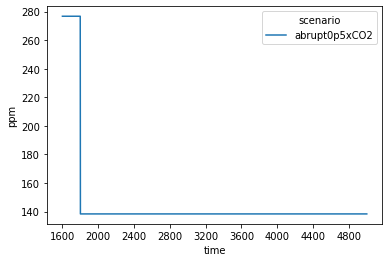

In [5]:
CDR_DIR = "CDRRUN"
abtests = MAGICCData(join(CDR_DIR,"ABRUPT0P5XCO2_CO2_CONC.IN"), columns={"scenario": ['abrupt0p5xCO2']})
abtests.metadata = {"header": "abrupt-0p5xCO2 experiment file, CO2 concentrations halve in 1800 \
    pymagicc, https://doi.org/10.21105/joss.00516, AGPL-3.0 License"}
abtests.line_plot()
abtests.timeseries()

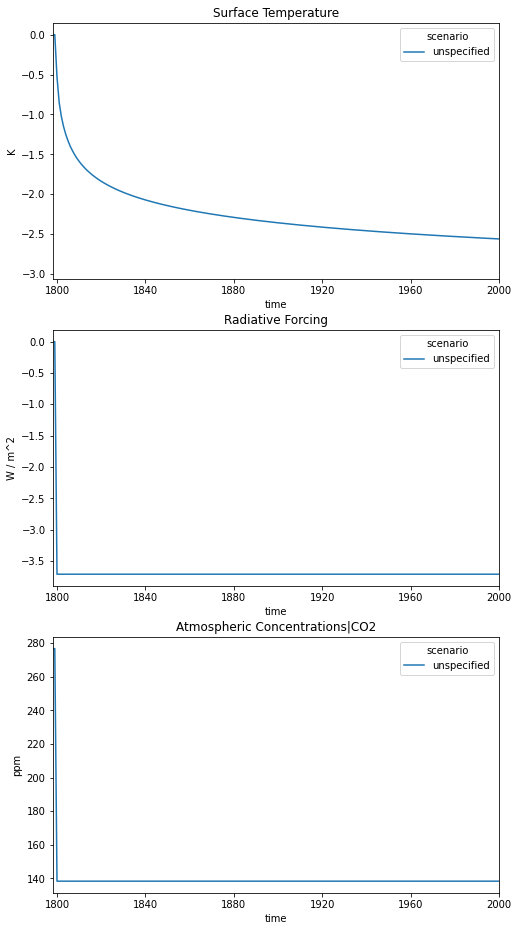

In [6]:
with MAGICC6() as magicc:
    co2_conc_filename = "ABRUPT0P5XCO2_CO2_CONC.IN"
    abtests.write(join(CDR_DIR, co2_conc_filename), magicc.version)
    res = magicc.run(
        file_co2_conc=co2_conc_filename, **magcfg)

fig, axes = plt.subplots((len(vars)), 1, figsize=(8, 16))
for n, var in enumerate(vars):
    res.filter(variable=var,region='World').lineplot(hue="scenario", ax=axes[n])
    ylab = res.filter(variable=var)["unit"].iloc[[0]].all()
    axes[n].set_ylabel(ylab)
    axes[n].set_title(var)                        
    axes[n].set_xlim(x)
